All beginning are hard

In [1]:
import numpy as np

It works in the end

In [2]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [3]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

In [4]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

In [5]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.453 km (ASL): 9.5550 m/s²


Launch Site Details

Launch Date: 2025-12-21 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.453 km
Forecast Time Period: from 2025-12-20 06:00:00 to 2026-01-05 06:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 1.17 m/s
Surface Wind Direction: 161.85°
Surface Wind Heading: 341.85°
Surface Pressure: 856.72 hPa
Surface Temperature: 287.91 K
Surface Air Density: 1.037 kg/m³
Surface Speed of Sound: 340.15 m/s


Earth Model Details

Earth Radius at Launch

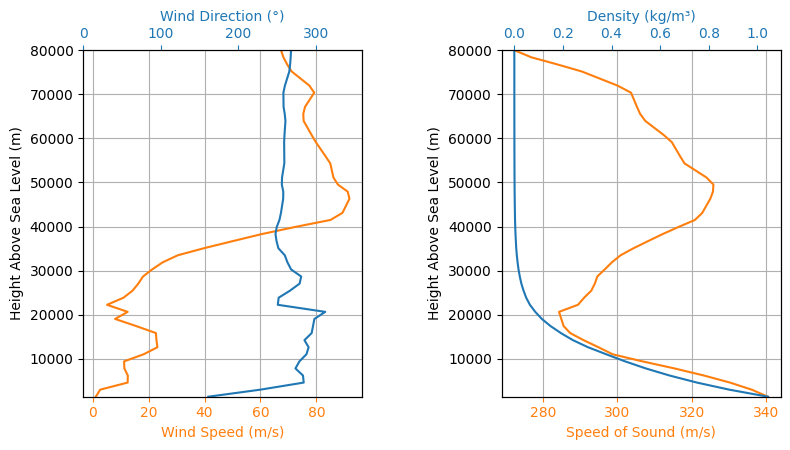

In [6]:
env.info()

In [7]:
from math import exp
from rocketpy import Fluid, LiquidMotor, CylindricalTank, MassFlowRateBasedTank

In [8]:
# Define fluids
oxidizer_liq = Fluid(name="N2O_l", density=1220)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277)
fuel_liq = Fluid(name="ethanol_l", density=789)
fuel_gas = Fluid(name="ethanol_g", density=1.59)

# Define tanks geometry
tanks_shape = CylindricalTank(radius = 0.1, height = 1.2, spherical_caps = True)

# Define tanks
oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tanks_shape,
    flux_time=5,
    initial_liquid_mass=32,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=lambda t: 32 / 3 * exp(-0.25 * t),
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

fuel_tank = MassFlowRateBasedTank(
    name="fuel tank",
    geometry=tanks_shape,
    flux_time=5,
    initial_liquid_mass=21,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=lambda t: 21 / 3 * exp(-0.25 * t),
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=lambda t: 0.01 / 3 * exp(-0.25 * t),
    liquid=fuel_liq,
    gas=fuel_gas,
)


In [9]:
example_liquid = LiquidMotor(
    thrust_source=lambda t: 4000,
    dry_mass=2,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=0.075,
    center_of_dry_mass_position=1.75,
    nozzle_position=0,
    burn_time=5,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
example_liquid.add_tank(tank=oxidizer_tank, position=1.0)
example_liquid.add_tank(tank=fuel_tank, position=2.5)

Nozzle Details
Nozzle Radius: 0.075 m

Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 53.020 kg
Structural Mass Ratio: 0.036
Average Propellant Exhaust Velocity: 450.990 m/s
Average Thrust: 4000.000 N
Maximum Thrust: 4000.0 N at 0.0 s after ignition.
Total Impulse: 20000.000 Ns



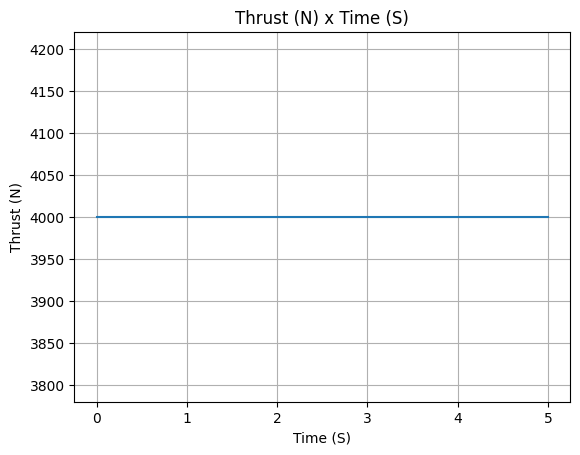

In [10]:
example_liquid.info()

Nozzle Details
Nozzle Radius: 0.075 m

Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 53.020 kg
Structural Mass Ratio: 0.036
Average Propellant Exhaust Velocity: 450.990 m/s
Average Thrust: 4000.000 N
Maximum Thrust: 4000.0 N at 0.0 s after ignition.
Total Impulse: 20000.000 Ns



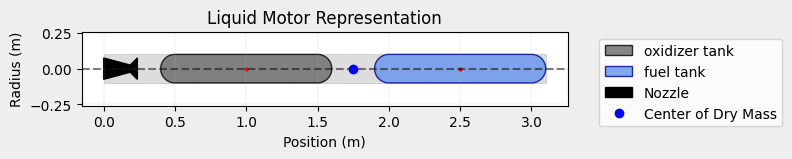

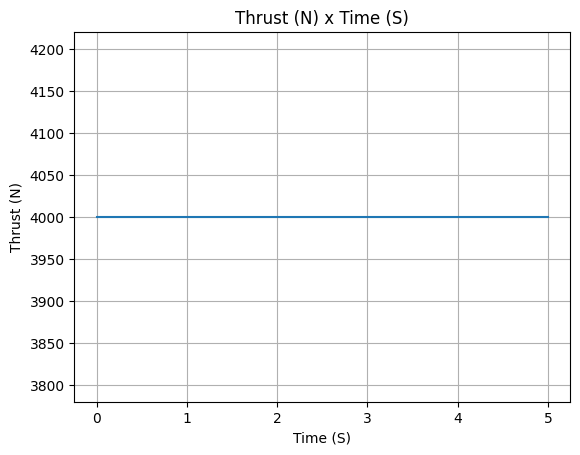

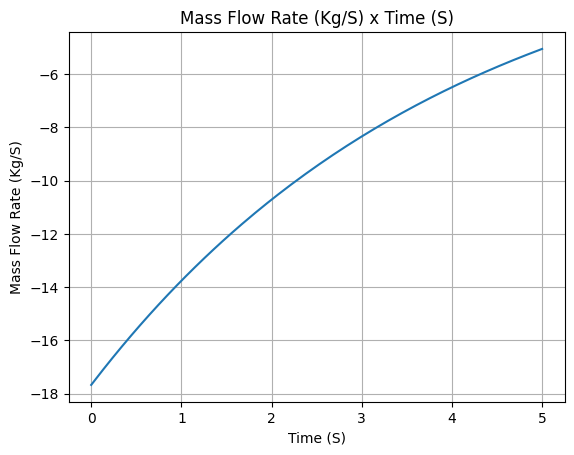

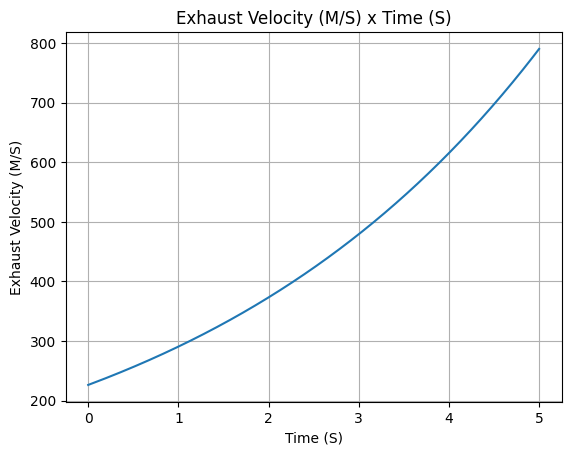

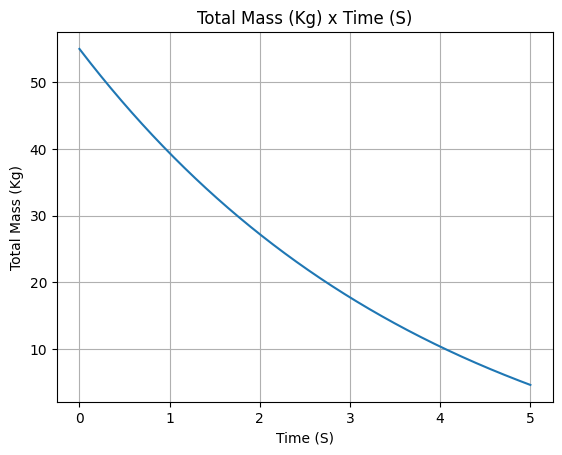

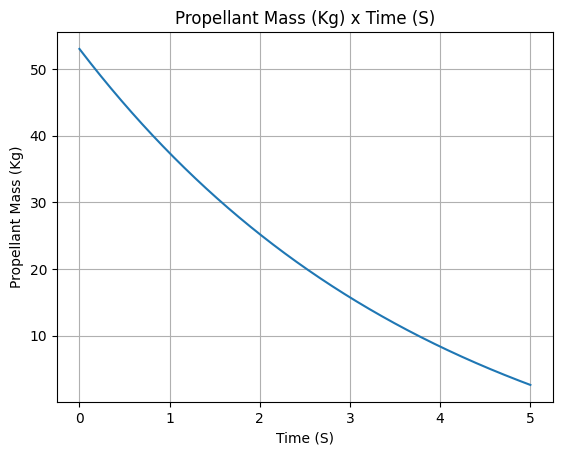

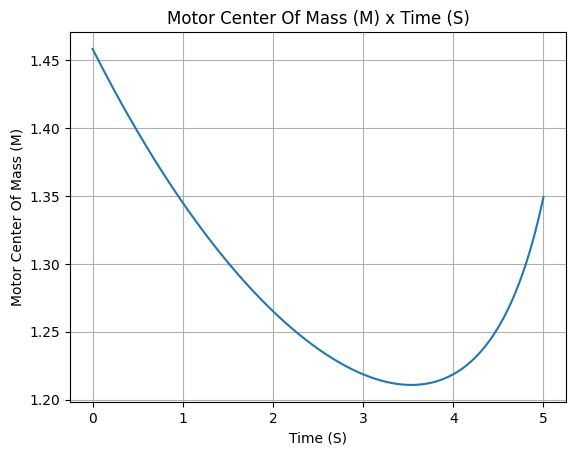

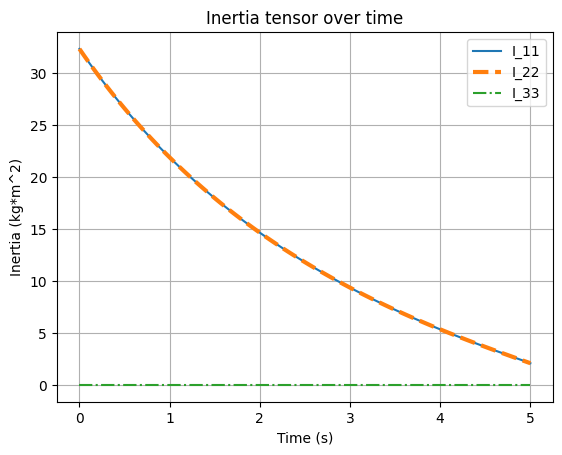

In [11]:
example_liquid.all_info()

In [12]:
calisto = Rocket(
    radius=150 / 2000,
    mass=1.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="C:/Users/krikb/Desktop/simulations/powerOffDragCurve.csv",
    power_on_drag="C:/Users/krikb/Desktop/simulations/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

ValueError: Could not read the csv or txt file to create Function source.

In [ ]:
calisto.add_motor(example_liquid, position=-1.255)

In [ ]:
rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.6182,
    angular_position=45,
)

In [ ]:
nose_cone = calisto.add_nose(
    length=0.55829, kind="von karman", position=1.278
)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

In [ ]:
main = calisto.add_parachute(
    name="main",
    cd_s=10.0,
    trigger=800,      # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
    radius=1.5,
    height=1.5,
    porosity=0.0432,
)

drogue = calisto.add_parachute(
    name="drogue",
    cd_s=1.0,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
    radius=1.5,
    height=1.5,
    porosity=0.0432,
)

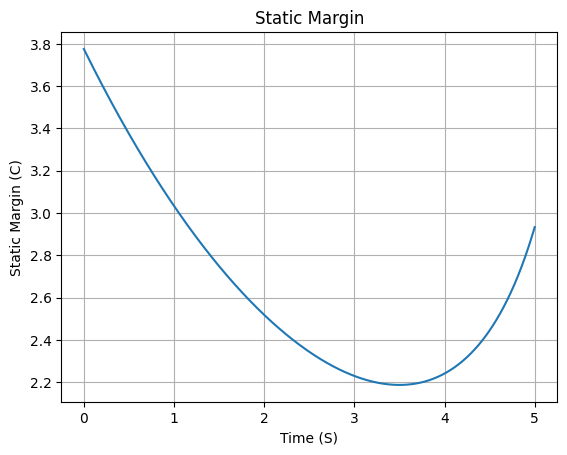

In [ ]:
calisto.plots.static_margin()

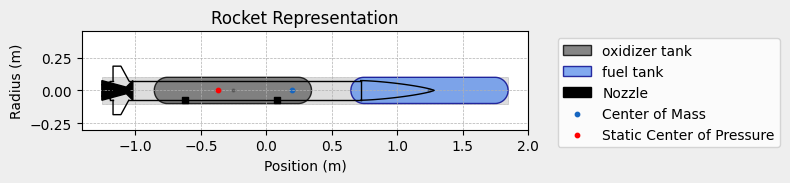

In [ ]:
calisto.draw()


In [ ]:
test_flight = Flight(
    rocket=calisto, environment=env, rail_length=5.2, inclination=85, heading=0
    )

In [ ]:
test_flight.prints.initial_conditions()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.923 | e1: -0.040 | e2: 0.017 | e3: 0.382
Euler Angles - Spin φ : 45.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 3.776 c


In [ ]:
test_flight.prints.out_of_rail_conditions()


Rail Departure State

Rail Departure Time: 0.348 s
Rail Departure Velocity: 22.654 m/s
Rail Departure Stability Margin: 3.494 c
Rail Departure Angle of Attack: 2.919°
Rail Departure Thrust-Weight Ratio: 8.067
Rail Departure Reynolds Number: 2.033e+05


In [ ]:
test_flight.prints.burn_out_conditions()


Burn out State

Burn out time: 5.000 s
Altitude at burn out: 2928.580 m (ASL) | 1457.114 m (AGL)
Rocket speed at burn out: 762.985 m/s
Freestream velocity at burn out: 763.096 m/s
Mach Number at burn out: 2.298
Kinetic energy at burn out: 1.751e+06 J


In [ ]:
test_flight.prints.apogee_conditions()


Apogee State

Apogee Time: 24.691 s
Apogee Altitude: 5962.726 m (ASL) | 4491.260 m (AGL)
Apogee Freestream Speed: 13.440 m/s
Apogee X position: 246.818 m
Apogee Y position: 636.129 m
Apogee latitude: 32.9959741°
Apogee longitude: -106.9723518°


In [ ]:
test_flight.prints.events_registered()


Parachute Events

Parachute: Drogue
	Ejection time: 24.695 s
	Inflation time: 26.195 s
	Freestream speed at inflation: 19.453 m/s
	Altitude at inflation: 5952.186 m (ASL) | 4480.720 m (AGL)
Parachute: Main
	Ejection time: 427.362 s
	Inflation time: 428.862 s
	Freestream speed at inflation: 8.336 m/s
	Altitude at inflation: 2259.796 m (ASL) | 788.330 m (AGL)


In [ ]:
test_flight.prints.impact_conditions()


Impact Conditions

Time of impact: 600.000 s
X impact: 0.000 m
Y impact: 0.000 m
Altitude impact: 1812.440 m (ASL) | 340.974 m (AGL) 
Latitude: 33.0052134°
Longitude: -106.8994607°
Vertical velocity at impact: 0.000 m/s
Number of parachutes triggered until impact: 2


In [ ]:
test_flight.prints.maximum_values()


Maximum Values

Maximum Speed: 763.091 m/s at 5.00 s
Maximum Mach Number: 2.298 Mach at 5.00 s
Maximum Reynolds Number: 5.988e+06 at 5.00 s
Maximum Dynamic Pressure: 2.623e+05 Pa at 5.00 s
Maximum Acceleration During Motor Burn: 183672.621 m/s² at 5.00 s
Maximum Gs During Motor Burn: 18729.395 g at 5.00 s
Maximum Acceleration After Motor Burn: 61.110 m/s² at 0.00 s
Maximum Gs After Motor Burn: 6.232 Gs at 0.00 s
Maximum Stability Margin: 3.776 c at 0.00 s
Maximum Upper Rail Button Normal Force: 0.293 N
Maximum Upper Rail Button Shear Force: 0.108 N
Maximum Lower Rail Button Normal Force: 1.037 N
Maximum Lower Rail Button Shear Force: 0.399 N


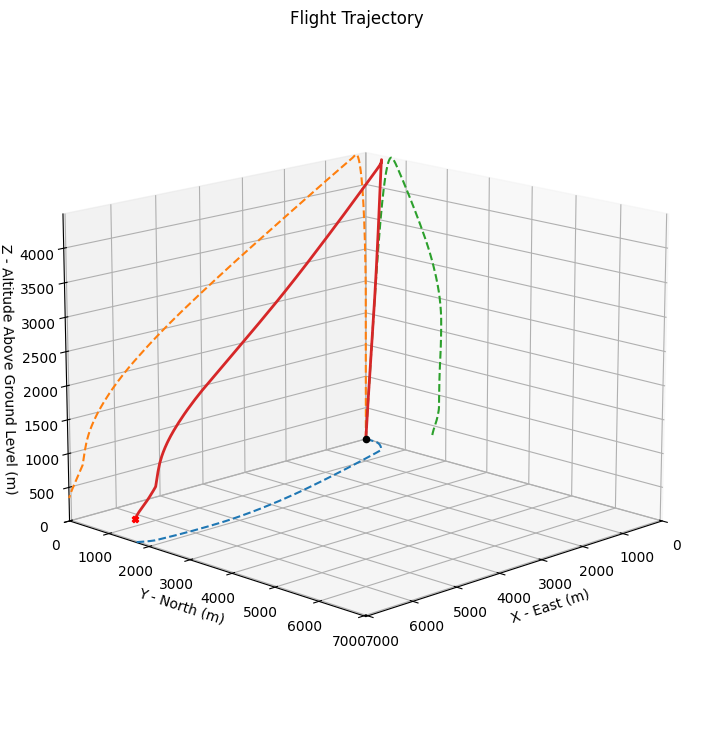

In [ ]:
test_flight.plots.trajectory_3d()